## Reading Data/Import Libraries

In [22]:
# importing libraries and reading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
plt.style.use('fast')


star_wars = pd.read_csv('star_wars.csv', encoding = 'ISO-8859-1')

## Cleaning and Shaping Data

In [23]:
# creating a global boolean state for Yes and No answers
yes_no = {
    'Yes': True,
    'No': False
}


star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [24]:
# renaming column names for each film in a sequence
star_wars.rename(
    columns = {
        star_wars.columns[3]: 'seen_1',
        star_wars.columns[4]: 'seen_2',
        star_wars.columns[5]: 'seen_3',
        star_wars.columns[6]: 'seen_4',
        star_wars.columns[7]: 'seen_5',
        star_wars.columns[8]: 'seen_6'
    }, inplace = True
)

# converting the above columns' 'seen' and 'not seen/no answer' values to True and False
def true_false(tf):
    if pd.isna(tf):
        return False
    return True

star_wars.iloc[:, 3:9] = star_wars.iloc[:, 3:9].applymap(true_false)

## Favorite Episodes Rank

### EP 5 - 'The Empire Strikes Back' Takes the Lead
(lowest bars - most favored)

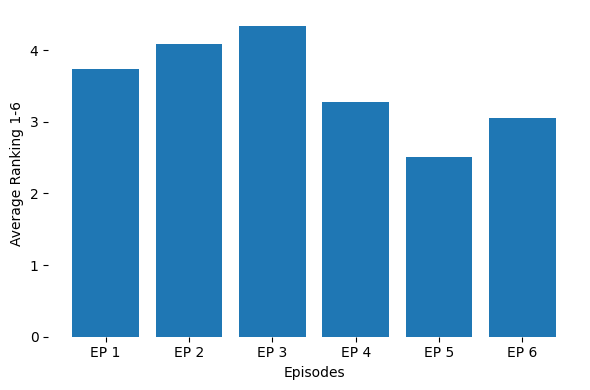

In [80]:
# renaming column names from most to least favorite
rank_fav = {
    star_wars.columns[9]: 'ranking_1',
    star_wars.columns[10]: 'ranking_2',
    star_wars.columns[11]: 'ranking_3',
    star_wars.columns[12]: 'ranking_4',
    star_wars.columns[13]: 'ranking_5',
    star_wars.columns[14]: 'ranking_6',
}

star_wars.rename(columns = rank_fav, inplace = True)

fav_movies_mean = star_wars[
    ['ranking_1',
     'ranking_2',
     'ranking_3',
     'ranking_4',
     'ranking_5',
     'ranking_6']].agg('mean')

# plot the average of most favorite movies
episodes = ['EP 1', 'EP 2', 'EP 3', 'EP 4', 'EP 5', 'EP 6']
fig, ax = plt.subplots()
fav_movies_plot = ax.bar(episodes, fav_movies_mean)
ax.set_xlabel('Episodes')
ax.set_ylabel('Average Ranking 1-6')
for sp in ['top', 'right', 'bottom', 'left']:
    ax.spines[sp].set_visible(False)
plt.tight_layout()
plt.show()

## Most Viewed Episode

### EP 5: 'The Empire Strikes Back' Tops the Chart opposed to EP 3: 'Revenge of the Sith' with the Least Views

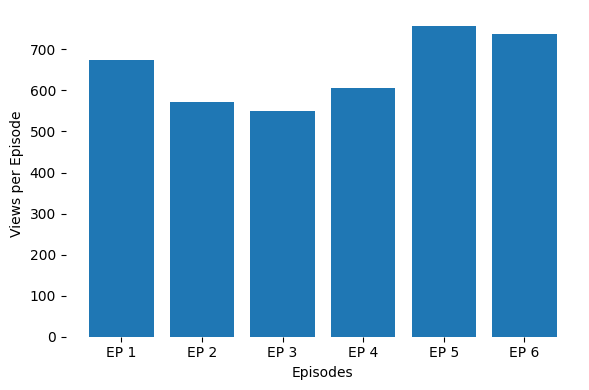

In [78]:
# summing 'True' values per 'Seen' columns
most_viewed = star_wars.iloc[:, 3:9].agg('sum')

# plotting the most viewed episodes
fig, ax = plt.subplots()
most_viewed_plot = ax.bar(episodes, most_viewed)
ax.set_xlabel('Episodes')
ax.set_ylabel('Views per Episode')
for sp in ['top', 'right', 'bottom', 'left']:
    ax.spines[sp].set_visible(False)
    plt.tight_layout()
plt.show()

### There Is a  Strong Correlation Between Favorite and Most Viewed Episodes

## Favorite and Most Viewed Episodes by Female Gender

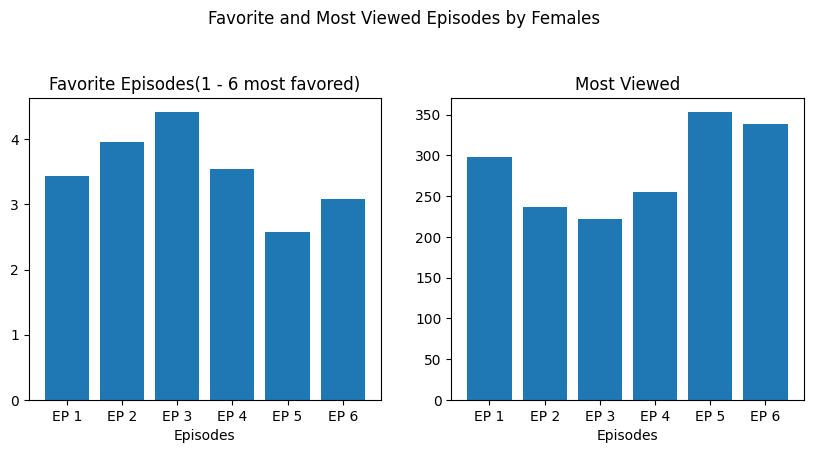

In [27]:
females = star_wars[star_wars['Gender'] == 'Female']

fav_ep_f = females.iloc[:, 9:15].agg('mean')
most_viewed_f = females.iloc[:, 3:9].agg('sum')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
p1 = ax1.bar(episodes, fav_ep_f)
p2 = ax2.bar(episodes, most_viewed_f)
ax1.set_xlabel('Episodes')
ax1.set_title('Favorite Episodes(1 - 6 most favored)')
ax2.set_xlabel('Episodes')
ax2.set_title('Most Viewed')
plt.suptitle('Favorite and Most Viewed Episodes by Females', y = 1.1)
plt.show()

## Favorite and Most Viewed Episodes by Male Gender

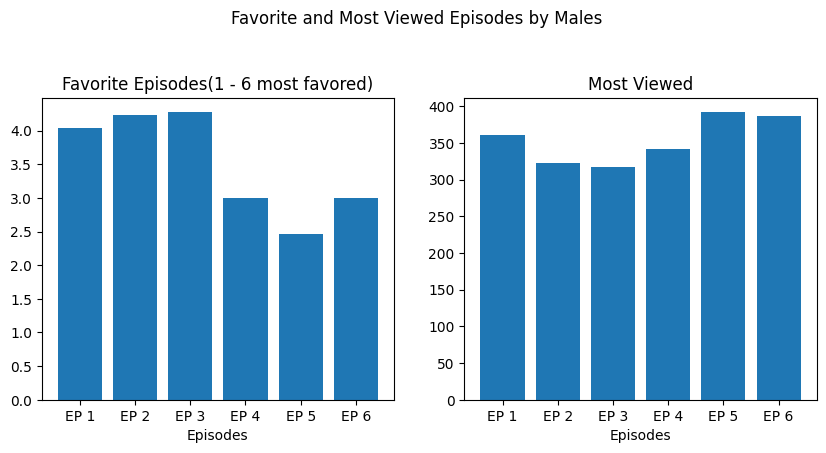

In [28]:
males = star_wars[star_wars['Gender'] == 'Male']

fav_ep_m = males.iloc[:, 9:15].agg('mean')
most_viewed_m = males.iloc[:, 3:9].agg('sum')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
p1 = ax1.bar(episodes, fav_ep_m)
p2 = ax2.bar(episodes, most_viewed_m)
ax1.set_xlabel('Episodes')
ax1.set_title('Favorite Episodes(1 - 6 most favored)')
ax2.set_xlabel('Episodes')
ax2.set_title('Most Viewed')
plt.suptitle('Favorite and Most Viewed Episodes by Males', y = 1.1)
plt.show()

### Both genders favor Ep 5 and are not satisfied with Ep 3. Males express stronger interest than females in Ep 1 and 2.

## Number of Participants Based on Education

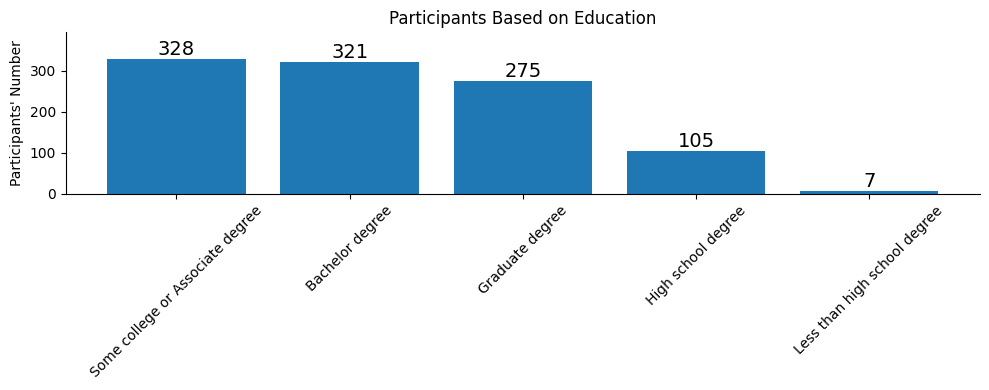

In [29]:
edu_part = star_wars['Education'].value_counts()

fig, ax = plt.subplots(figsize = (10, 4))
p = ax.bar(edu_part.index, edu_part)
for bar in p:
    ax.text(x = bar.get_x() + bar.get_width() / 2.0,
            y = bar.get_height(),
            s = bar.get_height(),
            ha = 'center',
            va = 'bottom',
            fontsize = 14
           )

ax.margins(y = 0.2)
plt.title('Participants Based on Education')
plt.ylabel('Participants\' Number')
plt.xticks(rotation = 45)
for sp in ['top', 'right']:
    ax.spines[sp].set_visible(False)
plt.tight_layout()
plt.show()

## Number of Participants Based on Location

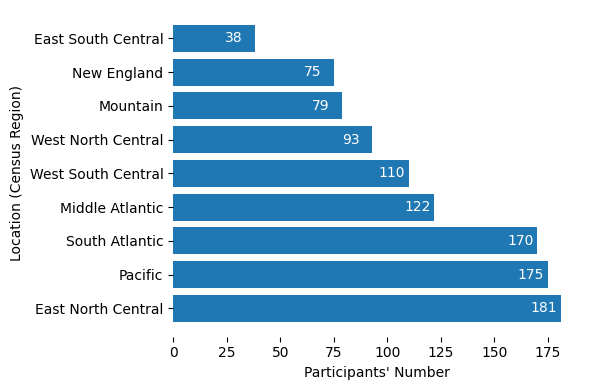

In [76]:
by_loc = star_wars['Location (Census Region)'].value_counts()

fig, ax = plt.subplots()
p = ax.barh(by_loc.index, by_loc)
plt.xlabel('Participants\' Number')
plt.ylabel('Location (Census Region)')

for sp in ['top', 'right', 'bottom', 'left']:
    ax.spines[sp].set_visible(False)

for bar in p:
    ax.text(
        x = bar.get_width() - 14,
        y = bar.get_y() + bar.get_height() / 2,
        s = bar.get_width(),
        ha = 'left',
        va = 'center',
        color = 'w'
    )
    
plt.tight_layout()
plt.show()

## Which Character Shot First(Han or Greedo)?

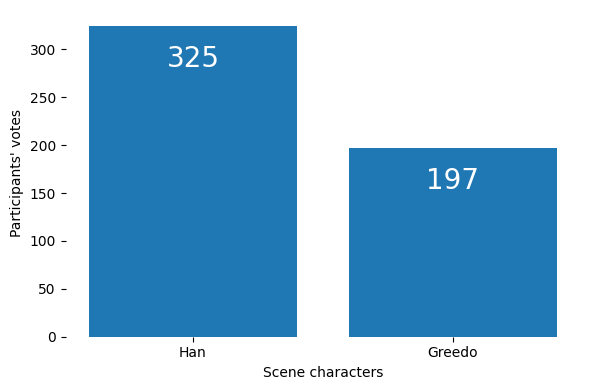

In [31]:
first_shot = star_wars['Which character shot first?'].value_counts()
first_shot_x = list(first_shot.index[[0, 2]])

fig, ax = plt.subplots()

p = ax.bar(['Han', 'Greedo'], [first_shot[0], first_shot[2]])

for bar in p:
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() - 20,
            bar.get_height(),
            fontsize = 20,
            color = 'w',
            ha = 'center',
            va = 'top'
           )
    
for sp in ['top', 'right', 'bottom', 'left']:
    ax.spines[sp].set_visible(False)

plt.xlabel('Scene characters')
plt.ylabel('Participants\' votes')
plt.tight_layout()
plt.show()

## Star Wars Fans vs Star Trek Fans

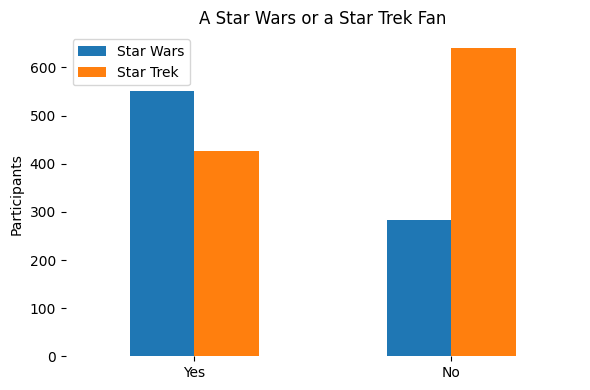

In [32]:
sw_fans = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()
st_fans = star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts()
st_fans.rename(index = {'Yes': True, 'No': False}, inplace = True)

sw_vs_st_fans = pd.DataFrame({
    'Star Wars': list(sw_fans),
    'Star Trek': [st_fans[1], st_fans[0]]},
    index = ['Yes', 'No']
)

sw_vs_st_fans.plot.bar(rot = 0)
plt.title('A Star Wars or a Star Trek Fan')
plt.ylabel('Participants')
plt.legend()

ax = plt.gca()
for sp in ['top', 'right', 'bottom', 'left']:
    ax.spines[sp].set_visible(False)

plt.tight_layout()
plt.show()

## Character Ratings

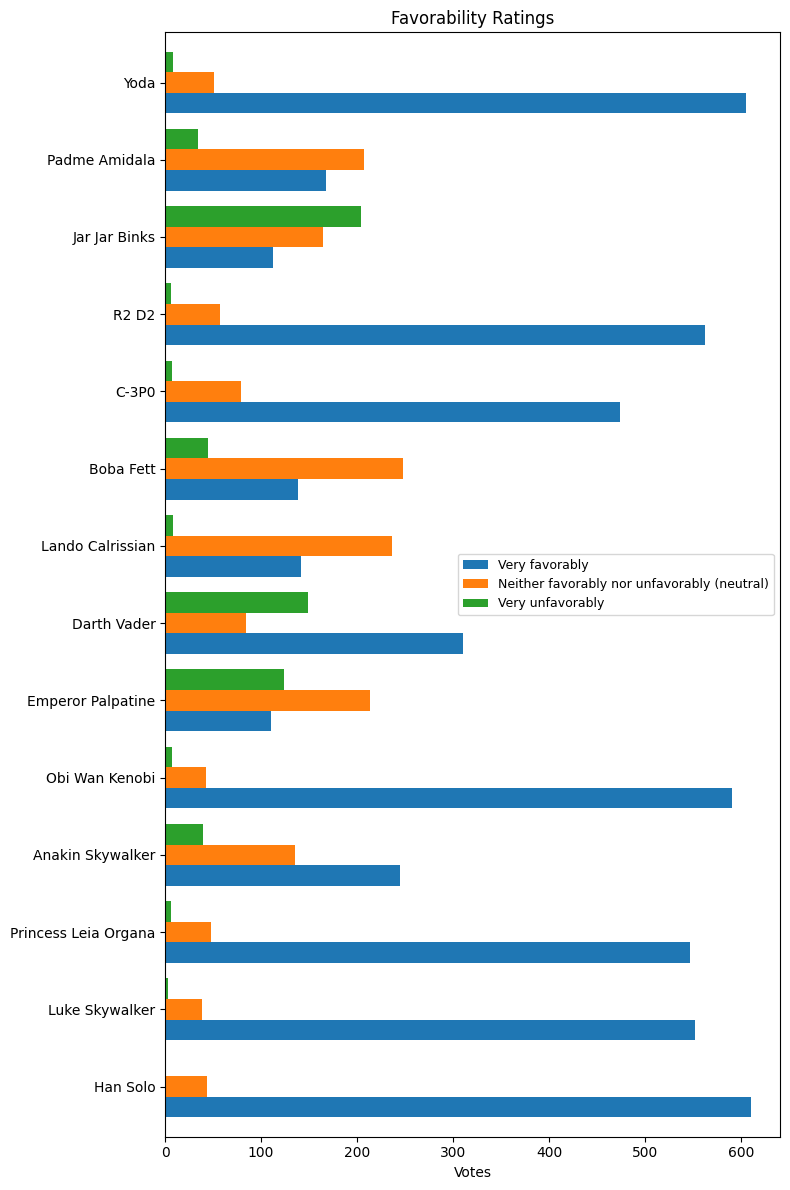

In [75]:
# Renaming columns with actual characters
character_names = {star_wars.columns[15]: 'Han Solo',
                   'Unnamed: 16': 'Luke Skywalker',
                   'Unnamed: 17': 'Princess Leia Organa',
                   'Unnamed: 18': 'Anakin Skywalker',
                   'Unnamed: 19': 'Obi Wan Kenobi',
                   'Unnamed: 20': 'Emperor Palpatine',
                   'Unnamed: 21': 'Darth Vader',
                   'Unnamed: 22': 'Lando Calrissian',
                   'Unnamed: 23': 'Boba Fett',
                   'Unnamed: 24': 'C-3P0',
                   'Unnamed: 25': 'R2 D2',
                   'Unnamed: 26': 'Jar Jar Binks',
                   'Unnamed: 27': 'Padme Amidala',
                   'Unnamed: 28': 'Yoda'
                  }


star_wars.rename(columns = character_names, inplace = True)


characters_ratings = []

df_characters = star_wars.iloc[:, 15:29].copy()
for i in range(len(df_characters.columns)):
    characters_ratings.append(df_characters.iloc[:, i].value_counts())


df_char_ratings = pd.DataFrame(characters_ratings)
df_char_ratings.drop(['Unfamiliar (N/A)', 'Somewhat favorably', 'Somewhat unfavorably'], axis = 1, inplace = True)
df_char_ratings.plot.barh(figsize = (8, 12), width = 0.8)
plt.title('Favorability Ratings')
plt.xlabel('Votes')
plt.legend(loc = 'center right', prop = {'size': 9})
plt.tight_layout()
plt.show()

## Seen Episodes per Household Income

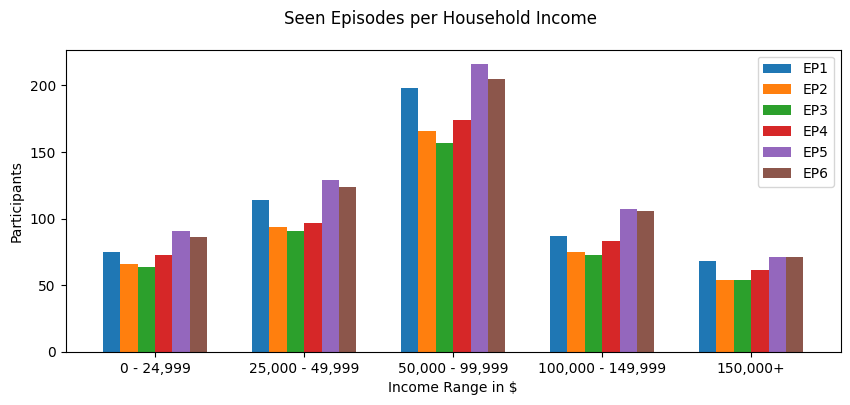

In [81]:
views_per_income = star_wars.copy()
seen_list = [x for x in views_per_income.loc[:, 'seen_1': 'seen_6']]

views_per_income['Household Income'] = views_per_income['Household Income'].str.replace('$', '')
views_per_income['income_l_range'] = views_per_income['Household Income'].astype(str)
views_per_income['income_l_range'] = views_per_income['income_l_range'].replace(r'(,.+)', '', regex = True).replace(r'\s.+', '', regex = True)
views_per_income['income_l_range'] = views_per_income['income_l_range'].astype(float)
xticks_ = ['0 - 24,999', '25,000 - 49,999', '50,000 - 99,999', '100,000 - 149,999', '150,000+']
views_per_income.groupby('income_l_range')[seen_list].agg('sum').plot(kind = 'bar', width = 0.7, figsize = (10, 4))
plt.suptitle('Seen Episodes per Household Income')
plt.xlabel('Income Range in $')
plt.ylabel('Participants')
plt.legend(['EP1', 'EP2', 'EP3', 'EP4', 'EP5', 'EP6'])
plt.xticks(ticks = [0, 1, 2, 3, 4], labels = xticks_, rotation = 0)
plt.show()